# Chapter 11: Computer Science Thinking: Recursion, Searching, Sorting and Big O

11. 5 ***(Recursive Function to Calculate the Sum of a List)*** Write a recursive function *sum(numbers, index)* that, when called, returns the sum of all the elements in a list of numbers.


When, for instance, using the list  *numbers = [5,4,3,2,1]* and initializing *index = 4*, the function *sum(numbers, index)* should return *15*

In [1]:
#11.5 Exercise: Recursive Function to Calculate the Sum of a List

def Sum(numbers, index):
    ''' Return the sum of the numbers in the list.
    
    Parameters
    ----------
    numbers
        a list of numbers
    index
        the index of the number in the list
    '''

    if index == 0:
        return numbers[index]
    else:
        return numbers[index] + Sum(numbers, index -1)
    
numbers = list(range(5, 0, -1))

print(f"Numbers = {numbers} \nThe sum of the numbers in the list is", Sum(numbers, 4))

Numbers = [5, 4, 3, 2, 1] 
The sum of the numbers in the list is 15


11. 7 ***(Improving Recursive Fibonacci Performance: Memoization)*** Research the performance enhancement technique called memoization. Modify Section 11.4's recursive fibonacci function to incorporate memoization. Compare the performance of both versions for *fibonacci(10)*, *fibonacci(20)* and *fibonacci(30)*

Output()

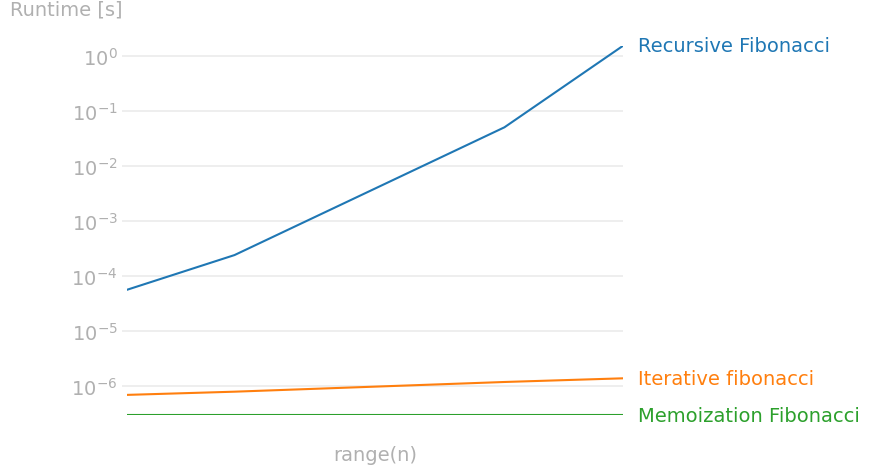

In [15]:
# Exercise 11.7: Improving Recursive Fibonacci Performance: Memoization
import numpy as np
import perfplot


def recursive_fibonacci(n: int) -> int:
    if n in (0, 1):  
        return n
    else:
        return recursive_fibonacci(n - 1) + recursive_fibonacci(n - 2)
    

def iterative_fibonacci(n):
    result = 0
    temp = 1
    for _ in range(0, n):
        temp, result = result, result + temp

    return result

def memoization_fibonacci(n: int) -> int:
    
    if n in cache.keys():
        return cache.get(n)
    
    else:
        cache[n] = memoization_fibonacci( n -1 ) + memoization_fibonacci(n - 2)     
        return cache.get(n)
    
    
    
cache = {0:0, 1:1} # Cache for memoization_fibonacci
    

perfplot.show(

    setup=lambda n: n,  
    kernels=[
        
        lambda a: recursive_fibonacci(a),
        lambda a: iterative_fibonacci(a),
        lambda a: memoization_fibonacci(a),
    ],
    labels=["Recursive Fibonacci","Iterative fibonacci", "Memoization Fibonacci"],
    n_range= sorted(np.random.randint(10, 40, size= 5)),
    xlabel= "range(n)",
)

In [11]:
print("Recursive Fibonacci runtime using timeit for n = 10")
%timeit recursive_fibonacci(10)

print("\nIterative Fibonacci runtime using timeit for n = 10")
%timeit iterative_fibonacci(10)

print("\nMemoization Fibonacci runtime using timeit for n = 10")
%timeit memoization_fibonacci(10)

Recursive Fibonacci runtime using timeit for n = 10
15.2 µs ± 811 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

Iterative Fibonacci runtime using timeit for n = 10
500 ns ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Memoization Fibonacci runtime using timeit for n = 10
132 ns ± 4.39 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [13]:
print("Recursive Fibonacci runtime using timeit for n = 20")
%timeit recursive_fibonacci(20)

print("\nIterative Fibonacci runtime using timeit for n = 20")
%timeit iterative_fibonacci(20)

print("\nMemoization Fibonacci runtime using timeit for n = 20")
%timeit memoization_fibonacci(20)

Recursive Fibonacci runtime using timeit for n = 20
1.81 ms ± 34.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Iterative Fibonacci runtime using timeit for n = 20
848 ns ± 4.78 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Memoization Fibonacci runtime using timeit for n = 20
125 ns ± 0.855 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [14]:
print("Recursive Fibonacci runtime using timeit for n = 30")
%timeit recursive_fibonacci(30)

print("\nIterative Fibonacci runtime using timeit for n = 30")
%timeit iterative_fibonacci(30)

print("\nMemoization Fibonacci runtime using timeit for n = 30")
%timeit memoization_fibonacci(30)

Recursive Fibonacci runtime using timeit for n = 30
218 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Iterative Fibonacci runtime using timeit for n = 30
1.22 µs ± 9.67 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)

Memoization Fibonacci runtime using timeit for n = 30
125 ns ± 1.38 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


11. 9 ***(Calculate the Number of Possible Combinations)*** For a gymnastic competition, there are 8 participants and 3 medals to win. Write a function that calculates the number of possible combinations of participants that can win the 3 medals. For this function, you will need to rewrite the factorial function that you studied at the beginning of this chapter.

In [2]:
#Exercise 11.9: Calculate The number of Possible Combinations

def iterative_factorial(n: int) -> int:
    '''Return factorial of number'''

    factorial = 1
    for num in range(1, n +1):
        factorial *= num

    return factorial

        
def possible_combinations(n: int, r: int) -> float | int:
    '''Returns the number of possible combinations of 'r' items from a set of 'n' items
        Using the formula C(n,r) = n! / ((n-r)!(r)!)
    
    Parameters
    ----------
    n : int
        the total number of items
    r : int
        the number of items to be selected
    
    Returns
    -------
        The number of possible combinations of r elements from a set of n elements.
    
    '''

    numerator = iterative_factorial(n)
    denominator = iterative_factorial(n - r ) * iterative_factorial( r )
    
    return  numerator / denominator 


participants = 8
medals = 3

print(f"The possible combinations for {participants} participants and {medals} medals are", possible_combinations(participants, medals) )

The possible combinations for 8 participants and 3 medals are 56.0


1. 10 ***(Random Order)*** Write a function that inputs a list and prints the elements of the list in random order on the screen. Use a recursive function *order* to determine the next element to be printed on screen. Test this function to determine the order in which five participants in a Formula One competition can start. [Hint: Use the *pop* function to remove an element from a list based on the index of this element.]

In [1]:
#Exercise 1.10 Random Order
import numpy as np

def choice(iterable: iter):
    '''chooses a random element from the iterable'''
    
    from random import randrange
    ## Linear congruential generator <--> (aX + C) mod m
    while True:
        multiplier = randrange(1,len(iterable)) #---> a
        increment = randrange(len(iterable)) # ---> c
        seed = randrange(len(iterable)) # --> X
        modulus = randrange(len(iterable), pow(len(iterable), 3)) #---> m
        next =  (multiplier * seed + increment ) % modulus
        
        if next < len(iterable):
            return iterable[next]
        
def order(sequence: iter, size: int) -> print:
    '''It takes a sequence and a size, and returns a random selection of the sequence of the size given
    
    Parameters
    ----------
    sequence : iter
        iterable
    size : int
        The number of random elements of the sequence.
        
        0 < size <= len(sequence)
    
    Returns
    -------
        A string of random elements of the sequence
    
    '''
   
    sequence = list(sequence)
    if size == 1:
        rand = sequence[size -1] if len(sequence) == 1 else choice(sequence)
        sequence.remove(rand)
        return rand
    
    elif size > 1:
        rand = choice(sequence)
        sequence.remove(rand)
        return f"{rand}, {order(sequence, size -1)}"
    else:
        print("The size must be greater than or equal to one")
        
        
    

array = np.random.randint(1,20,10)
participants = list(range(1, 6))


print(f"\t\t\t Participants \n\t\t\t{participants}")

print(f"\n\t\t Random order of race start \n\t\t\t{order(participants, 5)}")

print(f"\nArray: {array}")
print(f"Three random elements: {order(array, 3)}")


			 Participants 
			[1, 2, 3, 4, 5]

		 Random order of race start 
			2, 4, 1, 5, 3

Array: [14  6  4 16 16  2  9 19  4 10]
Three random elements: 9, 19, 16


11. 11 ***(Eight Queens)*** A puzzler for chess buffs is the Eight Queens problem, which asks: Is it possible to place eight queens on an empty chessboard so that no queen is "attacking" any other (i.e., no two queens are in the same row, in the same column or along the same diagonal)? For example, if a queen is placed in the upper-left corner of the board, no other queens could be placed in any of the marked squares shown in the following figure. Solve the problem recursively. [Hint: Your solution should begin with the first column and look for a location in that column where a queen can be placed—initially, place the queen in the first row. The solution should then recursively search the remaining columns. In the first few columns, there will be several locations where a queen may be placed. Take the first available location. If a column is reached with no possible location for a queen, the program should return to the previous column, and move the queen in that column to a new row. This continuous backing up and trying new alternatives is an example of recursive backtracking.]

| * | * | * | * | * | * | * | * |
|------|------|------|------|------|------|------|------|
| * |  *   |      |      |      |      |      |      |
| * |      |   *  |      |      |      |      |      |
| * |      |      |   *  |      |      |      |      |
| * |      |      |      |    * |      |      |      |
| * |      |      |      |      |   *  |      |      |
| * |      |      |      |      |      |   *  |      |
| * |      |      |      |      |      |      |    * |

In [8]:
#Exercise 11.11: Eight Queens
import numpy as np
import pandas as pd

def valid_position(r: int, c: int) -> bool:
    '''If the row and column are not already occupied, and the row and column do not share a diagonal with
    another queen, then the position is valid
    
    Parameters
    ----------
    r
        row
    c
        column
    
    Returns
    -------
        True if the position is valid, otherwise False.
    
    '''
   #First the vertical and horizontal columns are checked.
    if "[Q]" not in board[r] and "[Q]" not in board[:,c]:
        
        #If there is no queen in the same row and in the same column,
        for row_column in  range(64):
            row = row_column // 8
            column = row_column % 8
            #The diagonals are checked.
            if (row + column == r + c) or (row - column == r - c):
                if board[row,column] == "[Q]": 
                    return False
                
        else: return True         
    
    return False


def game(N_Queens: int) -> bool | None:
    '''Place N_Queens on an 8-by-8 board
    
    Parameters
    ----------
    N_Queens : int
        The number of queens that are left to be placed.
    
    Returns
    -------
        a bool or None.
    
    '''
    
    if N_Queens == 0:
        return True
    
    for row_column in  range(64):
        row = row_column // 8
        column = row_column % 8
        
        if "[Q]" not in board[row]:
            if valid_position(row,column):
                board[row, column] = "[Q]"
                
                if game(N_Queens-1):
                    return True
                
                board[row, column] = "[ ]"


    
board = np.full((8, 8), "[ ]")
    
print(f"{'Board':>20}")
display(pd.DataFrame(board, index= range(1,9), columns=range(1,9)))

game(8)

print(f"\n{'Board':>20}")
display(pd.DataFrame(board, index= range(1,9), columns=range(1,9)))
print("Total queens on the board:", (board == "[Q]").sum())

               Board


,1,2,3,4,5,6,7,8
1,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
2,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
3,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
4,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
5,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
6,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
7,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
8,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[ ]



               Board


,1,2,3,4,5,6,7,8
1,[Q],[ ],[ ],[ ],[ ],[ ],[ ],[ ]
2,[ ],[ ],[ ],[ ],[Q],[ ],[ ],[ ]
3,[ ],[ ],[ ],[ ],[ ],[ ],[ ],[Q]
4,[ ],[ ],[ ],[ ],[ ],[Q],[ ],[ ]
5,[ ],[ ],[Q],[ ],[ ],[ ],[ ],[ ]
6,[ ],[ ],[ ],[ ],[ ],[ ],[Q],[ ]
7,[ ],[Q],[ ],[ ],[ ],[ ],[ ],[ ]
8,[ ],[ ],[ ],[Q],[ ],[ ],[ ],[ ]


Total queens on the board: 8


11. 12 ***(Towers of Hanoi)*** In this chapter, you studied functions that can be easily implemented both recursively and iteratively. In this exercise, we present a problem whose recursive solution demonstrates the elegance of recursion, and whose iterative solution may not be as apparent.

&emsp; `The Towers of Hanoi` is one of the most famous classic problems every budding computer scientist must grapple with. Legend has it that in a temple in the Far East, priests are attempting to move a stack of golden disks from one diamond peg to another.

&emsp;The initial stack has 64 disks threaded onto one peg and arranged from bottom to top by decreasing size. The priests are attempting to move the stack from one peg to another under the constraints that exactly one disk is moved at a time and at no time may a larger disk be placed above a smaller disk. Three pegs are provided, one being used for temporarily holding disks. Supposedly, the world will end when the priests complete their task, so there is little incentive for us to facilitate their efforts.

&emsp; Let's assume that the priests are attempting to move the disks from peg 1 to peg 3. We wish to develop an algorithm that prints the precise sequence of peg-to-peg disk transfers.

&emsp; If we were to approach this problem with conventional functions, we would rapidly find ourselves hopelessly knotted up in managing the disks. Instead, attacking this problem with recursion in mind allows the steps to be simple. Moving *n* disks can be viewed in terms of moving only *n – 1* disks (hence, the recursion), as follows:
- a) Move *n – 1* disks from peg 1 to peg 2, using peg 3 as a temporary holding area.
- b) Move the last disk (the largest) from peg 1 to peg 3.
- c) Move the *n – 1* disks from peg 2 to peg 3, using peg 1 as a temporary holding area.

&emsp; The process ends when the last task involves moving *n = 1* disk (i.e., the base case). This task is accomplished by simply moving the disk, without the need for a temporary holding area. Write a program to solve the Towers of Hanoi problem. Use a recursive function with four parameters:
- a) The number of disks to be moved.
- b) The peg on which these disks are initially threaded.
- c) The peg to which this stack of disks is to be moved.
- d) The peg to be used as a temporary holding area.

&emsp; Display the precise instructions for moving the disks from the starting peg to the destination peg. To move a stack of three disks from peg 1 to peg 3, the program displays the following moves:

&emsp;&emsp;&emsp; 1 --> 3 (This means move one disk from peg 1 to peg 3.) \
&emsp;&emsp;&emsp; 1 --> 2 \
&emsp;&emsp;&emsp; 3 --> 2 \
&emsp;&emsp;&emsp; 1 --> 3 \
&emsp;&emsp;&emsp; 2 --> 1 \
&emsp;&emsp;&emsp; 2 --> 3 \
&emsp;&emsp;&emsp; 1 --> 3

In [1]:
#Exercise 11.12: Towers of Hanoi
def move(num_disk: int, from_peg: list, 
         to_peg: list, aux_peg: list) -> None:
   
   if num_disk: 
         
        move(num_disk - 1, from_peg, aux_peg, to_peg)
        
        to_peg[1].append(from_peg[1].pop())
        print(from_peg[0],"--->", to_peg[0])
   
        move(num_disk - 1, aux_peg, to_peg, from_peg)

peg1 = [1, list(range(3))]
peg2 = [2, list()]
peg3 = [3, list()]

print(f"Peg1: {peg1[1]} \npeg2: {peg2[1]} \npeg3: {peg3[1]}\n")

print("peg 1 to peg 3")
move(3, peg1, peg3, peg2)

print(f"\nPeg1: {peg1[1]} \npeg2: {peg2[1]} \npeg3: {peg3[1]}")

Peg1: [0, 1, 2] 
peg2: [] 
peg3: []

peg 1 to peg 3
1 ---> 3
1 ---> 2
3 ---> 2
1 ---> 3
2 ---> 1
2 ---> 3
1 ---> 3

Peg1: [] 
peg2: [] 
peg3: [0, 1, 2]


11. 16 ***(Timing Sorting Algorithms)*** Remove the output statements from the functions
*selection_sort*, *insertion_sort* and *merge_sort* defined in this chapter, then import
each example's source-code file into IPython. Create a 100,000-element array of random
integers named *data1* and make two additional copies of the array (*data2* and *data3*) by
calling method copy on the original array. Next, use *%timeit* as follows to compare the
performance of each sorting algorithm:

&emsp;&emsp;&emsp; **%timeit* -n 1 -r 1 selectionsort.selection_sort(data1)**\
&emsp;&emsp;&emsp; **%timeit* -n 1 -r 1 insertionsort.insertion_sort(data2)**\
&emsp;&emsp;&emsp; **%timeit* -n 1 -r 1 mergesort.merge_sort(data3)**

Do the *selection_sort* and *insertion_sort* take approximately the same amount of
time? Is *merge_sort* much faster?

Output()

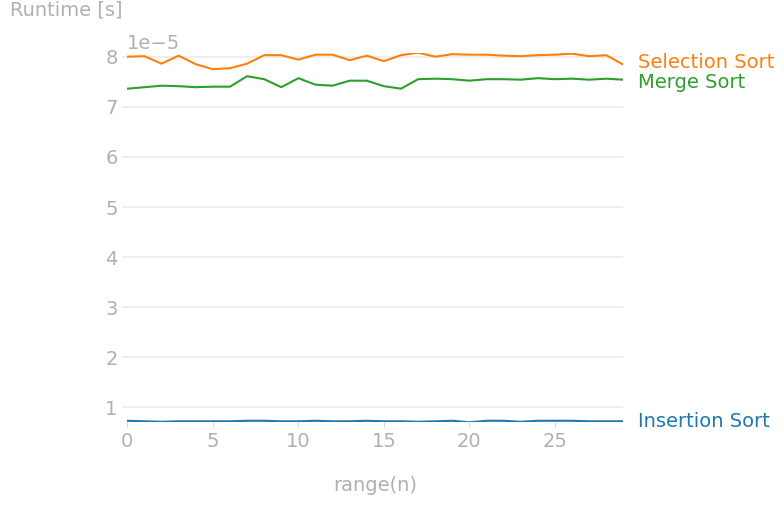

In [1]:
#Exercise 11.16: Timing Sorting Algorithms
import numpy as np
import perfplot


def insertion_sort(data):
    """Sort an array using insertion sort."""
    # loop over len(data) - 1 elements      
    for next in range(1, len(data)):
        insert = data[next]  # value to insert 
        move_item = next  # location to place element

        # search for place to put current element         
        while move_item > 0 and data[move_item - 1] > insert:  
            # shift element right one slot
            data[move_item] = data[move_item - 1]         
            move_item -= 1                                      
                                              
        data[move_item] = insert  # place inserted element 



def selection_sort(data):
    """Sort array using selection sort."""
    # loop over len(data) - 1 elements      
    for index1 in range(len(data) - 1):
        smallest = index1  # first index of remaining array

        # loop to find index of smallest element                      
        for index2 in range(index1 + 1, len(data)): 
            if data[index2] < data[smallest]:
                smallest = index2
                                              
        # swap smallest element into position
        data[smallest], data[index1] = data[index1], data[smallest]  


# calls recursive sort_array method to begin merge sorting
def merge_sort(data):
    sort_array(data, 0, len(data) - 1) 

def sort_array(data, low, high):
    """Split data, sort subarrays and merge them into sorted array."""
    # test base case size of array equals 1     
    if (high - low) >= 1:  # if not base case
        middle1 = (low + high) // 2  # calculate middle of array
        middle2 = middle1 + 1  # calculate next element over     


        # split array in half then sort each half (recursive calls)
        sort_array(data, low, middle1)  # first half of array       
        sort_array(data, middle2, high)  # second half of array     

        # merge two sorted arrays after split calls return
        merge(data, low, middle1, middle2, high)              

# merge two sorted subarrays into one sorted subarray             
def merge(data, left, middle1, middle2, right):
    left_index = left  # index into left subarray              
    right_index = middle2  # index into right subarray         
    combined_index = left  # index into temporary working array
    merged = [0] * len(data)  # working array        

    # merge arrays until reaching end of either         
    while left_index <= middle1 and right_index <= right:
        # place smaller of two current elements into result  
        # and move to next space in arrays                   
        if data[left_index] <= data[right_index]:       
            merged[combined_index] = data[left_index]
            combined_index += 1
            left_index += 1
        else:                                                 
            merged[combined_index] = data[right_index] 
            combined_index += 1
            right_index += 1

    # if left array is empty                                
    if left_index == middle2:  # if True, copy in rest of right array
        merged[combined_index:right + 1] = data[right_index:right + 1]
    else: # right array is empty, copy in rest of left array                              
        merged[combined_index:right + 1] = data[left_index:middle1 + 1]

    data[left:right + 1] = merged[left:right + 1]  # copy back to data


data1 = np.random.randint(100_000, size= 100_000)
data2 = data1.copy()
data3 = data1.copy()

perfplot.show(

    setup=lambda n: np.random.randint(1000, size=30),  
    kernels=[
        
        lambda a: insertion_sort(a),
        lambda a: selection_sort(a),
        lambda a: merge_sort(a),
    ],
    equality_check=None,
    labels=["Insertion Sort","Selection Sort", "Merge Sort"],
    n_range= list(range(30)),
    xlabel= "range(n)",
)



In [3]:

%timeit -n 1 -r 1 selection_sort(data1)
%timeit -n 1 -r 1 insertion_sort(data2)
%timeit -n 1 -r 1 merge_sort(data3)

11. 17 ***(Bucket Sort)*** A bucket sort begins with a one-dimensional array of positive integers to be sorted and a two-dimensional array of integers with rows indexed from 0 to 9 and columns indexed from *0* to *n – 1*, where n is the number of values to be sorted Each row of the two-dimensional array is referred to as a *bucket*. Write a class named *BucketSort* containing a function called *sort* that operates as follows:

- a) Place each value of the one-dimensional array into a row of the bucket array, based on the value's "ones" (rightmost) digit. For example, 97 is placed in row 7, 3 is placed in row 3, and 100 is placed in row 0. This procedure is called a *distribution pass*.

- b) Loop through the bucket array row by row, and copy the values back to the original array. This procedure is called a* gathering pass*. The new order of the preceding values in the one-dimensional array is 100, 3 and 97.

- c) Repeat this process for each subsequent digit position (tens, hundreds, thousands, etc.). On the second (tens digit) pass, 100 is placed in row 0, 3 is placed in row 0 (because 3 has no tens digit), and 97 is placed in row 9. After the gathering pass, the order of the values in the one-dimensional array is 100, 3 and 97. On the third (hundreds digit) pass, 100 is placed in row 1, 3 is placed in row 0, and 97 is placed in row 0 (after the 3). After this last gathering pass, the original array is in sorted order

&emsp;&emsp;&emsp;The two-dimensional array of buckets is 10 times the length of the integer array being sorted. This sorting technique provides better performance than a selection and insertion sorts but requires much more memory—the selection and insertion sorts require space for only one additional element of data. This comparison is an example of a space/time trade-off: The bucket sort uses more memory than the selection and insertion sorts, but performs better. This version of the bucket sort requires copying all the data back to the original array on each pass. Another possibility is to create a second two-dimensional bucket array and repeatedly swap the data between the two bucket arrays.

In [1]:
#Exercise 11.17: Bucket Sort

import numpy as np

class BucketSort:
    
    def __init__(self, arr: list[int]) -> None:
        
        self.__array =  list(arr)
        
    def sort(self) -> None:
        maximum = str(max(self.__array))
    
        for exponent in range(1, len(maximum) + 1):
            
            bucket  = [[] for _ in range(10)]
            place_value = pow(10, exponent)
            divisor = place_value // 10
            
            for elem in self.__array:
                
                index = elem % place_value // divisor 
                bucket[index].append(elem) # distribution pass
            
            self.__array = [elem for row in bucket for elem in row] # gathering pass
            

    def __repr__(self) -> str:
        return "< " + str(self.__array)[1:-1] + " >"

np.random.seed(33)
array_numpy = np.random.randint(1851, size= 10)

array_bucket =  BucketSort(array_numpy.copy())

print("\t\t Before\n")
print(f"array numpy: {array_numpy}\n")
print(f"array bucket: {array_bucket}")

array_numpy.sort()
array_bucket.sort()


print("\n\t\t After\n")
print(f"array numpy: {array_numpy}\n")
print(f"array bucket: {array_bucket}")

		 Before

array numpy: [1044  391 1752  578  658 1225   57  195  102   61]

array bucket: < 1044, 391, 1752, 578, 658, 1225, 57, 195, 102, 61 >

		 After

array numpy: [  57   61  102  195  391  578  658 1044 1225 1752]

array bucket: < 57, 61, 102, 195, 391, 578, 658, 1044, 1225, 1752 >


11. 19 ***(Quicksort)*** The recursive sorting technique called quicksort uses the following basic algorithm for a one-dimensional array of values:

- a) Partitioning Step: Take the first element of the unsorted array and determine its final location in the sorted array (i.e., all values to the left of the element in the array are less than the element, and all values to the right of the element in the array are greater than the element). We now have one element in its proper location and two unsorted subarrays.
- b) Recursive Step: Perform Step 1 on each unsorted subarray. Each time Step 1 is performed on a subarray, another element is placed in its final location of the sorted array, and two unsorted subarrays are created. When a subarray consists of one element, that element is in its final location (because a one-element array is already sorted).

Write recursive function *quick_sort* to sort a one-dimensional integer array

In [2]:
import numpy as np

def quick_sort(array: iter, low: int, high: int):
    
    if low < high:
        pi = partition(array, low, high)
        
        quick_sort(array, low, pi -1)
        quick_sort(array, pi +1, high)

def partition(array: iter, low: int, high: int):
    
    pivot = array[high]
    
    index = low 
    
    for j in range(low, high):
        if array[j] <= pivot:
            array[index], array[j] = array[j], array[index]
            index += 1
    
    array[index], array[high] = array[high], array[index]
    
    return index


np.random.seed(4)
arr = np.random.randint(100, size=10)
test = arr.copy()
test.sort()

display(arr)
quick_sort(arr, 0, len(arr) -1)
display(arr)

print(arr == test)

array([46, 55, 69,  1, 87, 72, 50,  9, 58, 94])

array([ 1,  9, 46, 50, 55, 58, 69, 72, 87, 94])

[ True  True  True  True  True  True  True  True  True  True]


11. 20 ***(Determining Big O of Various Algorithms)*** Determine the Big O for each of the
following. You may need to research some of these items online:
- a) Get or set an item by index in a Python list.
- b) Insert a new value in order in a Python sorted list.
- c) Shell short an array.
- d) Bubble sort an array.
- e) Find all the permutations (unique arrangements) of n unique items.

#### Answers

- a) $O(1)$ ->   Prof: require only one operation.
- b) $O(n)$ ->   Prof: requires at most n – 1 comparisons.
- c) $O(n^2)$ -> Prof: if the array where all positioned even elements are greater than the median. Odd and even elements are not compared until the last increment of 1 is reached.
- d) $O(n^2)$ -> Prof: Occurs when the array elements are in disordered order (neither ascending nor descending) or if we want to sort in ascending order and the array is in descending order.
- e) $O(n!)$ ->  Prof: For the digits 1, 2 and 3 there are six permutations—[123, 132, 213, 231, 312 and 321.] For the digits 1, 2, 3 and 4 there are 24 permutations. For the digits 1, 2, 3, 4 and 5 there are 120 permutations, and so on.

11. 21 ***(Project: Quicksort Animation)*** Look at the QuickSort.mp4 video file provided with this chapter's examples. Using the techniques you learned in the selection sort animation, modify your solution to Exercise 11.19 to display an animation of the quicksort algorithm in action.

In [28]:
#Exercise 11.21 : Quicksort Animation

from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pysine import sine
import sys

TWELFTH_ROOT_2 = 1.059463094359  # 12th root of 2
A3 = 220  # hertz frequency for musical note A from third octave 

def play_sound(i, seconds=0.1):
    """Play a note representing a bar's magnitude. Calculation 
    based on https://pages.mtu.edu/~suits/NoteFreqCalcs.html."""
    sine(frequency=(A3 * TWELFTH_ROOT_2 ** i), duration=seconds)
    
    
def update(frame_data):
    """Display bars representing the current state."""    
    # unpack info for graph update
    data, colors, swaps, comparisons = frame_data
    plt.cla()  # clear old contents of current Figure

    # create barplot and set its xlabel
    bar_positions = np.arange(len(data))
    axes = sns.barplot(x=bar_positions, y=data, palette=colors)  # new bars
    axes.set(xlabel=f'Comparisons: {comparisons}; Swaps: {swaps}',
             xticklabels=data)  
    
    
def flash_bars(index1, index2, data, colors, swaps, comparisons):
    """Flash the bars about to be swapped and play their notes."""
    for _ in range(2):
        
        colors[index1], colors[index2] = 'white', 'white'
        yield (data, colors, swaps, comparisons) 
        
        colors[index1], colors[index2] = 'purple', 'purple'
        yield (data, colors, swaps, comparisons) 
        
        play_sound(data[index1], seconds=0.05)
        play_sound(data[index2], seconds=0.05)


def quick_sort(array: iter, low: int, high: int):
    '''Sort the data using the quick sort algorithm and yields values that update uses to visualize the
    algorithm.
    
    Parameters
    ----------
    array : iterable
        list or np.array
        
    low : int
        the index of the first element in the array
    high : int
        the index of the last element in the array
    '''

    
    if low < high: # base case 
        
        global comparisons, swaps
        
        colors = ['lightgray'] * len(array) # list of bar colors
        colors[:low] = ["green"] * low # Sets the indexes already sorted in green

        half = yield from partition(array, low, high)
        
        # Recursive call with left half of array, i.e array[:half]
        yield from quick_sort(array, low, int(half) -1)
        
        # Recursive call with right half of array, i.e array[half:]
        yield from quick_sort(array, int(half) +1, high)

        # play each bar's note once and color it darker green
        for index in range(low, high +1): 
            colors[index] = 'green'
            yield (array, colors, swaps, comparisons)
            play_sound(array[index], seconds=0.05)
        


def partition(array: iter, low: int, high: int):
    '''It receives half of the array, sorts it and  yields values that update uses to visualize the algorithm.
    
    Parameters
    ----------
    array : iterable
        list or np.array
        
    low : int
        the index of the first element in the array
    high : int
        the index of the last element in the array
        
    Returns
    -------
        The new half if used with quick sort.
    '''
    global comparisons, swaps
    
    colors = ['lightgray'] * len(array)  # list of bar colors
    colors[:low] = ["green"] * low # Sets the indexes already sorted in green

    
    #display initial bars representing shuffled values
    yield (array, colors, swaps, comparisons)   
    
    index = low 
    pivot = array[high] 
    
    for j in range(low, high):
     
        comparisons += 1
        colors[index] = 'purple'
        colors[j] = 'red'
        yield (array, colors, swaps, comparisons)       
        
        if array[j] <= pivot:
            
            colors[index] = 'lightgray'
            colors[j] = 'lightgray'
            
            array[index], array[j] = array[j], array[index]
            index += 1
            
            yield (array, colors, swaps, comparisons) 
            
        else:
            colors[j] = 'lightgray'
            yield (array, colors, swaps, comparisons) 
            
    # ensure that last bar is not purple
    colors[-1] = 'lightgray'
    
    # flash the bars about to be swapped
    yield from flash_bars(high, index, array, colors, 
                              swaps, comparisons)  
    
    # swap the elements at positions index and largest
    array[index], array[high] = array[high], array[index]
    swaps += 1    
    
    # flash the bars that were just swapped
    yield from flash_bars(high, index, array, colors, 
                        swaps, comparisons)
    
    # Returns the new half 
    return index


def main():
    
    global comparisons, swaps
    comparisons =  0
    swaps = 0
    number_of_values = int(sys.argv[1]) if len(sys.argv) == 2 else 30

    figure = plt.figure('Quick Sort')  # Figure to display barplot
    numbers = np.arange(1, number_of_values)  # create array 
    np.random.shuffle(numbers)  # shuffle the array
    
    # start the animation
    anim = animation.FuncAnimation(figure, update, repeat=False,
        frames=quick_sort(numbers, 0, len(numbers) -1), interval=50)
    
    plt.show()  # display the Figure
    
if __name__ == '__main__':
    
    main()   

print("Note: Jupyter Notebooks does not support command lines and animations with sounds.")


<IPython.core.display.Javascript object>

Note: Jupyter Notebooks does not support command lines and animations with sounds.
